# Graduation Factors

In [3]:
%matplotlib inline

import pandas as pd
import datetime
import time
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import re
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf, pacf

plt.rcParams['figure.figsize'] = (15, 5)

In [22]:
data = pd.read_csv('./assets/admissions.csv')
data[0:3]

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0


### Hypothesis

We will try to determine what correlation there is between the admition status (0|1) and the other factors (gre, gpa and prestige), for the given dataset. Our primary assumption is that a higher prestige number should result in a higher frequency of admit.


In [5]:
admissions = len(data[data['admit'] == 1])
non_admissions = len(data[data['admit'] == 0])
avg = data['admit'].mean() * 100

print("Out of " + str(len(data)) + " students there are " + str(admissions) + " admitted students and " + str(non_admissions) + " non-admitted.")

print("This represent an average of " + str(avg) + "% admission rate.")

Out of 400 students there are 127 admitted students and 273 non-admitted.
This represent an average of 31.75% admission rate.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x114aa91d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x117210110>]], dtype=object)

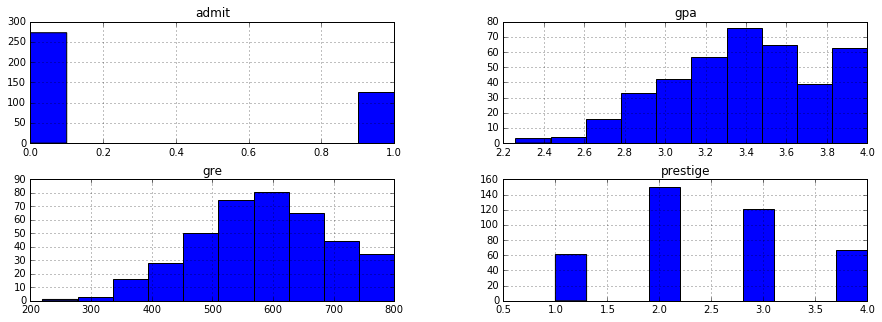

In [6]:
data.hist()

### Let's correlate each data row with admission

In [19]:
avg_gre_admit = data['gre'][data['admit'] == 1].dropna().mean()
avg_gre_non_admit = data['gre'][data['admit'] == 0].dropna().mean()
difference_gre = 100-abs(avg_gre_non_admit/avg_gre_admit)*100
var_gre = data['gre'][data['admit'] == 0].dropna().var()
print("Admitted students had on average "+ str(avg_gre_admit)+" gre, while non-admitted had "+str(avg_gre_non_admit))

avg_gpa_admit = data['gpa'][data['admit'] == 1].dropna().mean()
avg_gpa_non_admit = data['gpa'][data['admit'] == 0].dropna().mean()
difference_gpa = 100-abs(avg_gpa_non_admit/avg_gpa_admit)*100
var_gpa = data['gpa'].dropna().var()
print("Admitted students had on average "+ str(avg_gpa_admit)+" gpa, while non-admitted had "+str(avg_gpa_non_admit))

avg_prestige_admit = data['prestige'][data['admit'] == 1].dropna().mean()
avg_prestige_non_admit = data['prestige'][data['admit'] == 0].dropna().mean()
difference_prestige = 100-abs(avg_prestige_non_admit/avg_prestige_admit)*100
var_prestige = data['prestige'].dropna().var()
print("Admitted students had on average "+ str(avg_prestige_admit)+" prestige, while non-admitted had "+str(avg_prestige_non_admit))


Admitted students had on average 618.897637795 gre, while non-admitted had 573.579335793
Admitted students had on average 3.48920634921 gpa, while non-admitted had 3.34540441176
Admitted students had on average 2.15079365079 prestige, while non-admitted had 2.64102564103


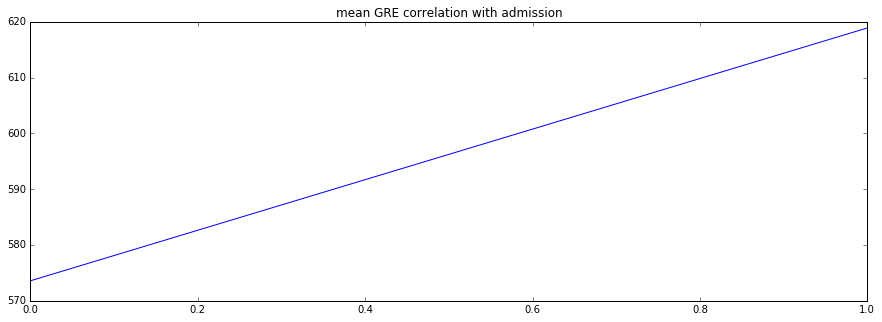

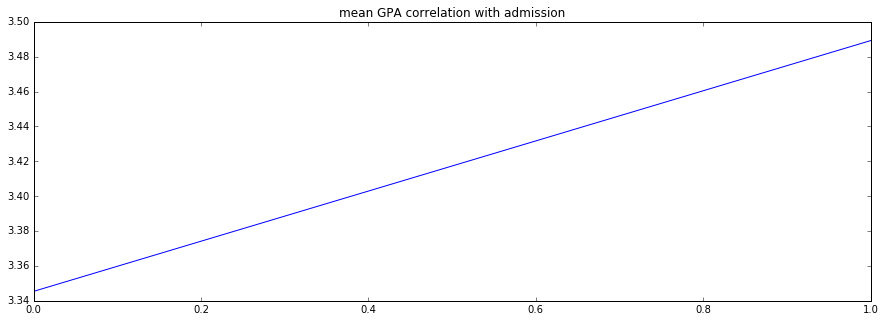

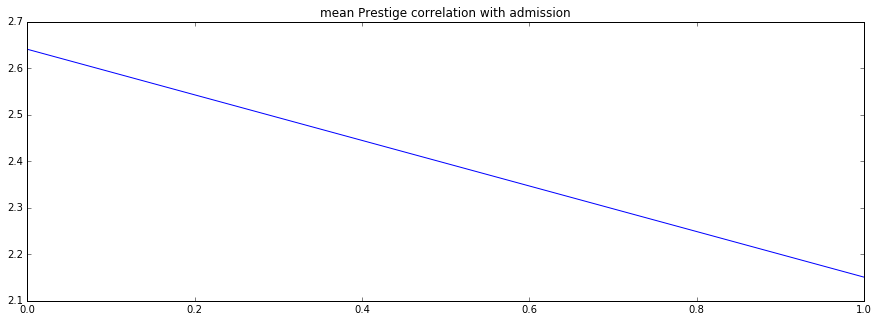

In [8]:
admissions_mean_gre = pd.Series(np.linspace(avg_gre_non_admit, avg_gre_admit, 2))
plt.plot(admissions_mean_gre)
plt.title('mean GRE correlation with admission')
plt.show()

admissions_mean_gpa = pd.Series(np.linspace(avg_gpa_non_admit, avg_gpa_admit, 2))
plt.plot(admissions_mean_gpa)
plt.title('mean GPA correlation with admission')
plt.show()

admissions_mean_prestige = pd.Series(np.linspace(avg_prestige_non_admit, avg_prestige_admit, 2))
plt.plot(admissions_mean_prestige)
plt.title('mean Prestige correlation with admission')
plt.show()

In [20]:
print("The difference of GRE values between admitted and non admitted students was " + str(abs(difference_gre))+ "%.")
print("The difference of GPA values between admitted and non admitted students was " + str(abs(difference_gpa))+ "%.")
print("The difference of Prestige values between admitted and non admitted students was " + str(abs(difference_prestige))+ "%.")

print("The standard deviation was " + str(var_gre) + "(GRE), " + str(var_gpa) + "(GPA), " + str(var_prestige) + ".")

The difference of GRE values between admitted and non admitted students was 7.32242284255%.
The difference of GPA values between admitted and non admitted students was 4.12133657484%.
The difference of Prestige values between admitted and non admitted students was 22.7930740846%.
The standard deviation was 13468.2520159(GRE), 0.144879486222(GPA), 0.893653732321.


We can observe that contrarily to what was initially though, prestige is seems to be negatively correlated with admission. Prestige must be noted from 1.0 down to 5.0.

It does seem this way that all factors affect the admission rate significantly, and have a positive correlation with the outcome, except for prestige which is noted in reversed. 

Comparing by the difference on each factor between admitted and non-admitted students, it appears that the order of importance of the data points can be arranged as: ***Prestige > GRE > GPA***